In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [5]:
import zipfile as zf

files = zf.ZipFile(r"C:\project\Flowers-Dataset.zip")
files.extractall()
files.close()

In [6]:
import zipfile as zf

files = zf.ZipFile(r"C:\project\Flowers-Dataset.zip")
files.extractall()
files.close()

In [8]:
import glob
import zipfile

In [9]:
files = glob.glob("C:\project\Flowers-Dataset.zip")

In [10]:
files


['C:\\project\\Flowers-Dataset.zip']

In [11]:
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data/raw')

Unzipping: C:\project\Flowers-Dataset.zip


In [12]:
file

'C:\\project\\Flowers-Dataset.zip'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen= ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip =True,vertical_flip =False)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
x_train = train = train_datagen.flow_from_directory(r'C:\project\data\raw\flowers\sunflower',target_size = (10,10),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [17]:
x_test = test_datagen.flow_from_directory(r'C:\project\data\raw\flowers\rose',target_size = (1,5),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [18]:
x_train.class_indices

{}

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [21]:
model= Sequential()

In [22]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu')) 

In [23]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [26]:
32*(3*3*3+1)

896

In [27]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [28]:
model.add(Dense(4,activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [30]:
len(x_train)

0

In [31]:
len(x_test)

0

In [32]:
model.save('flower.h5')

In [33]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
odel = load_model('flower.h5')

In [35]:
img = image.load_img(r"C:\project\data\raw\flowers\sunflower\4877195645_791c3a83b9_m.jpg")

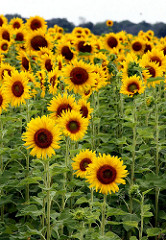

In [36]:
img

In [38]:
img = image.load_img(r"C:\project\data\raw\flowers\sunflower\4877195645_791c3a83b9_m.jpg",target_size=(64,64))

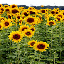

In [39]:
img

In [40]:
x=image.img_to_array(img)

In [41]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [253., 255., 254.],
        [253., 255., 254.],
        [252., 254., 253.]],

       [[254., 255., 255.],
        [254., 255., 255.],
        [254., 255., 255.],
        ...,
        [251., 253., 252.],
        [253., 255., 254.],
        [253., 255., 254.]],

       [[255., 253., 255.],
        [252., 250., 255.],
        [252., 254., 249.],
        ...,
        [252., 254., 251.],
        [251., 253., 250.],
        [252., 254., 253.]],

       ...,

       [[ 33.,  59.,  14.],
        [ 30.,  59.,  15.],
        [ 60.,  80.,   8.],
        ...,
        [ 55.,  74.,  28.],
        [ 78., 100.,  18.],
        [ 99., 116.,  46.]],

       [[ 40.,  63.,  17.],
        [ 19.,  43.,   7.],
        [ 22.,  42.,  15.],
        ...,
        [107.,  87.,  34.],
        [ 92.,  81.,  75.],
        [ 98., 103.,  80.]],

       [[ 37.,  62.,  23.],
        [ 25.,  44.,  14.],
        [ 11.,  

In [42]:
x.shape

(64, 64, 3)

In [43]:
x=np.expand_dims(x,axis=0)

In [44]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 354ms/step


In [45]:
y

array([3], dtype=int64)

In [46]:
x_train.class_indices

{}

In [47]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [48]:
index[y[0]]

'sunflower'

In [49]:
index[2]

'rose'